# Python for Researchers

## Day Four Objectives

*   learn and use Google Colab for writing Python
*   practice a text analysis workflow using data pulled from the Journal of Language in Society
*   review Pandas and dataframes
*   review cleaning and working with textual data
*   learn TF-IDF for preliminary analysis of a corpus



## Section One: Our Data

The journal Language in Society is an international journal in sociolinguistics. Our dataset contains the metadata of journal articles, reviews and other matter from 1980-2018. The data was pulled directly from JSTOR using Constellate Ithaka's dataset and analysis tool. 

We are using this data set because: it has already been gathered, cleaned and tested and it came from a reliable source.

[Pull the dataset from here](https://drive.google.com/file/d/1qOBGbm7f8g3Hkb4deOAJmXkXrh2b7D37/view?usp=sharing)

### Create a dataframe 

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("meta_journLangSoc.csv")

In [ ]:
df.head(5)

,id,title,isPartOf,publicationYear,doi,docType,docSubType,provider,collection,datePublished,...,creator,publisher,language,pageStart,pageEnd,placeOfPublication,keyphrase,wordCount,pageCount,outputFormat
0,http://www.jstor.org/stable/4167356,A Reply to Pateman on Singular They (Discussion),Language in Society,1983,NaN,article,research-article,jstor,NaN,1983-03-01,...,Donald G. Mackay,Cambridge University Press,eng,75,76,NaN,mackay; pateman; prescriptive; language; patem...,790,2,unigrams; bigrams; trigrams
1,http://www.jstor.org/stable/26847725,Deconstructing variation in pragmatic function,Language in Society,2018,NaN,article,research-article,jstor,NaN,2018-09-01,...,MARTINA WILTSCHKO; DEREK DENIS; ALEXANDRA D’ARCY,Cambridge University Press,eng,569,599,NaN,contextually derived; wiltschko derek; ina wil...,12359,31,unigrams; bigrams; trigrams
2,http://www.jstor.org/stable/4167072,Variable Data and Linguistic Convergence: Text...,Language in Society,1979,NaN,article,research-article,jstor,NaN,1979-08-01,...,Ronald Scollon,Cambridge University Press,eng,223,243,NaN,chipewyan; fort chipewyan; mandeville; consona...,9506,21,unigrams; bigrams; trigrams
3,http://www.jstor.org/stable/4167260,"Codes, Modalities, and the Process of Cultural...",Language in Society,1981,NaN,article,research-article,jstor,NaN,1981-12-01,...,Basil Bernstein,Cambridge University Press,eng,327,363,NaN,social division; classificatory; communicative...,17155,37,unigrams; bigrams; trigrams
4,http://www.jstor.org/stable/43904746,The Evaluation of Language Regimes: Theory and...,Language in Society,2016,NaN,article,book-review,jstor,NaN,2016-04-01,...,Rongbin Wang; Michele Gazzola,Cambridge University Press,eng,328,329,NaN,language regimes; patent organizations; evalua...,590,2,unigrams; bigrams; trigrams


### Explore the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4163 entries, 0 to 4162
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4163 non-null   object 
 1   title               4163 non-null   object 
 2   isPartOf            4163 non-null   object 
 3   publicationYear     4163 non-null   int64  
 4   doi                 0 non-null      float64
 5   docType             4163 non-null   object 
 6   docSubType          4163 non-null   object 
 7   provider            4163 non-null   object 
 8   collection          0 non-null      float64
 9   datePublished       4163 non-null   object 
 10  issueNumber         4154 non-null   float64
 11  volumeNumber        4163 non-null   int64  
 12  url                 4163 non-null   object 
 13  creator             3528 non-null   object 
 14  publisher           4163 non-null   object 
 15  language            4163 non-null   object 
 16  pageSt

In [ ]:
df['docSubType'].value_counts()

docSubType
book-review         2670
research-article     857
misc                 636
Name: count, dtype: int64

In [ ]:
df['publicationYear'].value_counts()

publicationYear
2007    133
2008    133
1983    129
1984    119
2018    112
2009    112
1985    110
2011    106
2012    105
1981    104
1989    104
1990    103
2013    103
1988    102
1991    101
1986    101
2010    100
1992     99
2016     99
2017     95
2015     92
1995     91
2014     91
1999     89
2002     88
1994     86
1993     85
2000     84
1987     84
2001     83
2006     83
2004     83
2005     78
1998     77
1996     76
1980     76
2003     76
1977     75
1975     72
1979     71
1997     67
1978     66
1982     62
1976     48
1972     39
1973     36
1974     35
Name: count, dtype: int64

In [ ]:
df['publicationYear'].value_counts().sort_index(ascending=False)

publicationYear
2018    112
2017     95
2016     99
2015     92
2014     91
2013    103
2012    105
2011    106
2010    100
2009    112
2008    133
2007    133
2006     83
2005     78
2004     83
2003     76
2002     88
2001     83
2000     84
1999     89
1998     77
1997     67
1996     76
1995     91
1994     86
1993     85
1992     99
1991    101
1990    103
1989    104
1988    102
1987     84
1986    101
1985    110
1984    119
1983    129
1982     62
1981    104
1980     76
1979     71
1978     66
1977     75
1976     48
1975     72
1974     35
1973     36
1972     39
Name: count, dtype: int64

## Section Two: Cleaning Our Data

First we'll drop everything we don't need and focus only on the columns that have relevant information. 

Let's say we want to explore our 'titles' column and look at what words and topics appear in titles the most over time. 

First, we'll drop the columns that don't have any information in them. 

In [ ]:
df = df.drop(['doi', 'collection',
                'placeOfPublication'], axis=1)
df.head(10)

,id,title,isPartOf,publicationYear,docType,docSubType,provider,datePublished,issueNumber,volumeNumber,url,creator,publisher,language,pageStart,pageEnd,keyphrase,wordCount,pageCount,outputFormat
0,http://www.jstor.org/stable/4167356,A Reply to Pateman on Singular They (Discussion),Language in Society,1983,article,research-article,jstor,1983-03-01,1.0,12,http://www.jstor.org/stable/4167356,Donald G. Mackay,Cambridge University Press,eng,75,76,mackay; pateman; prescriptive; language; patem...,790,2,unigrams; bigrams; trigrams
1,http://www.jstor.org/stable/26847725,Deconstructing variation in pragmatic function,Language in Society,2018,article,research-article,jstor,2018-09-01,4.0,47,http://www.jstor.org/stable/26847725,MARTINA WILTSCHKO; DEREK DENIS; ALEXANDRA D’ARCY,Cambridge University Press,eng,569,599,contextually derived; wiltschko derek; ina wil...,12359,31,unigrams; bigrams; trigrams
2,http://www.jstor.org/stable/4167072,Variable Data and Linguistic Convergence: Text...,Language in Society,1979,article,research-article,jstor,1979-08-01,2.0,8,http://www.jstor.org/stable/4167072,Ronald Scollon,Cambridge University Press,eng,223,243,chipewyan; fort chipewyan; mandeville; consona...,9506,21,unigrams; bigrams; trigrams
3,http://www.jstor.org/stable/4167260,"Codes, Modalities, and the Process of Cultural...",Language in Society,1981,article,research-article,jstor,1981-12-01,3.0,10,http://www.jstor.org/stable/4167260,Basil Bernstein,Cambridge University Press,eng,327,363,social division; classificatory; communicative...,17155,37,unigrams; bigrams; trigrams
4,http://www.jstor.org/stable/43904746,The Evaluation of Language Regimes: Theory and...,Language in Society,2016,article,book-review,jstor,2016-04-01,2.0,45,http://www.jstor.org/stable/43904746,Rongbin Wang; Michele Gazzola,Cambridge University Press,eng,328,329,language regimes; patent organizations; evalua...,590,2,unigrams; bigrams; trigrams
5,http://www.jstor.org/stable/41682236,Hand talk: Sign language among American Indian...,Language in Society,2012,article,book-review,jstor,2012-09-01,4.0,41,http://www.jstor.org/stable/41682236,Sara Goico; Jeffrey E. Davis,Cambridge University Press,eng,549,550,language; hand talk; lingua franca; goico ucsd...,568,2,unigrams; bigrams; trigrams
6,http://www.jstor.org/stable/4168729,Review Article,Language in Society,1996,article,book-review,jstor,1996-09-01,3.0,25,http://www.jstor.org/stable/4168729,Yael Maschler; Eliezer Ben-Rafael,Cambridge University Press,eng,476,480,ben rafael; linguistic; dominant culture; ashk...,2329,5,unigrams; bigrams; trigrams
7,http://www.jstor.org/stable/4168147,Back Matter,Language in Society,1990,article,misc,jstor,1990-06-01,2.0,19,http://www.jstor.org/stable/4168147,NaN,Cambridge University Press,eng,310,310,language; linguistics; thematic issue; creole;...,2110,7,unigrams; bigrams; trigrams
8,http://www.jstor.org/stable/4168825,Review Article,Language in Society,1998,article,book-review,jstor,1998-03-01,1.0,27,http://www.jstor.org/stable/4168825,Ron Scollon; Chase Hensel,Cambridge University Press,eng,141,143,hensel; central yupik; social practices; subsi...,1200,3,unigrams; bigrams; trigrams
9,http://www.jstor.org/stable/4168724,Review Article,Language in Society,1996,article,book-review,jstor,1996-09-01,3.0,25,http://www.jstor.org/stable/4168724,William Frawley; Jay L. Lemke,Cambridge University Press,eng,456,459,discourse; technocratic discourse; bourdieu; s...,1730,4,unigrams; bigrams; trigrams


In [ ]:
df['creator'] = df['creator'].str.casefold()
df['title'] = df['title'].str.casefold()
df['keyphrase'] = df['keyphrase'].str.casefold()
df.head(10)

,id,title,isPartOf,publicationYear,docType,docSubType,provider,datePublished,issueNumber,volumeNumber,url,creator,publisher,language,pageStart,pageEnd,keyphrase,wordCount,pageCount,outputFormat
0,http://www.jstor.org/stable/4167356,a reply to pateman on singular they (discussion),Language in Society,1983,article,research-article,jstor,1983-03-01,1.0,12,http://www.jstor.org/stable/4167356,donald g. mackay,Cambridge University Press,eng,75,76,mackay; pateman; prescriptive; language; patem...,790,2,unigrams; bigrams; trigrams
1,http://www.jstor.org/stable/26847725,deconstructing variation in pragmatic function,Language in Society,2018,article,research-article,jstor,2018-09-01,4.0,47,http://www.jstor.org/stable/26847725,martina wiltschko; derek denis; alexandra d’arcy,Cambridge University Press,eng,569,599,contextually derived; wiltschko derek; ina wil...,12359,31,unigrams; bigrams; trigrams
2,http://www.jstor.org/stable/4167072,variable data and linguistic convergence: text...,Language in Society,1979,article,research-article,jstor,1979-08-01,2.0,8,http://www.jstor.org/stable/4167072,ronald scollon,Cambridge University Press,eng,223,243,chipewyan; fort chipewyan; mandeville; consona...,9506,21,unigrams; bigrams; trigrams
3,http://www.jstor.org/stable/4167260,"codes, modalities, and the process of cultural...",Language in Society,1981,article,research-article,jstor,1981-12-01,3.0,10,http://www.jstor.org/stable/4167260,basil bernstein,Cambridge University Press,eng,327,363,social division; classificatory; communicative...,17155,37,unigrams; bigrams; trigrams
4,http://www.jstor.org/stable/43904746,the evaluation of language regimes: theory and...,Language in Society,2016,article,book-review,jstor,2016-04-01,2.0,45,http://www.jstor.org/stable/43904746,rongbin wang; michele gazzola,Cambridge University Press,eng,328,329,language regimes; patent organizations; evalua...,590,2,unigrams; bigrams; trigrams
5,http://www.jstor.org/stable/41682236,hand talk: sign language among american indian...,Language in Society,2012,article,book-review,jstor,2012-09-01,4.0,41,http://www.jstor.org/stable/41682236,sara goico; jeffrey e. davis,Cambridge University Press,eng,549,550,language; hand talk; lingua franca; goico ucsd...,568,2,unigrams; bigrams; trigrams
6,http://www.jstor.org/stable/4168729,review article,Language in Society,1996,article,book-review,jstor,1996-09-01,3.0,25,http://www.jstor.org/stable/4168729,yael maschler; eliezer ben-rafael,Cambridge University Press,eng,476,480,ben rafael; linguistic; dominant culture; ashk...,2329,5,unigrams; bigrams; trigrams
7,http://www.jstor.org/stable/4168147,back matter,Language in Society,1990,article,misc,jstor,1990-06-01,2.0,19,http://www.jstor.org/stable/4168147,NaN,Cambridge University Press,eng,310,310,language; linguistics; thematic issue; creole;...,2110,7,unigrams; bigrams; trigrams
8,http://www.jstor.org/stable/4168825,review article,Language in Society,1998,article,book-review,jstor,1998-03-01,1.0,27,http://www.jstor.org/stable/4168825,ron scollon; chase hensel,Cambridge University Press,eng,141,143,hensel; central yupik; social practices; subsi...,1200,3,unigrams; bigrams; trigrams
9,http://www.jstor.org/stable/4168724,review article,Language in Society,1996,article,book-review,jstor,1996-09-01,3.0,25,http://www.jstor.org/stable/4168724,william frawley; jay l. lemke,Cambridge University Press,eng,456,459,discourse; technocratic discourse; bourdieu; s...,1730,4,unigrams; bigrams; trigrams


In [ ]:
titles = df.copy()[["title", "publicationYear"]]
titles = titles.rename({"publicationYear":"year"}, axis=1)
titles.head()

,title,year
0,a reply to pateman on singular they (discussion),1983
1,deconstructing variation in pragmatic function,2018
2,variable data and linguistic convergence: text...,1979
3,"codes, modalities, and the process of cultural...",1981
4,the evaluation of language regimes: theory and...,2016


## TF-IDF Analysis

TF-IDF stands for Text Frequency-Inverse Document Frequency 

TF- is basically a normalized word count, so total number of times a word appears in a doc / number of words in that doc 

TF-IDF - is the significance of a words normalized across an entire corpus, so a words 'importance' relative to how frequently it appears in an article and the corpus as whole (words that show up in many articles are less important -those that show up in fewer articles are more important)

A common example is to think about how you might choose a place to eat in a new city. Since you are in a new place, not only do you want to go to a *good* place, you want to do to a place that is *unique*. Local reviews and reccomendations might point you towards what is good, but you'd need an additional tool or step to find out, among those places, which offers unique cuisine. 

In text analysis, some words might appear an entire set of works. For example, in almost every Steven King novel someone is wearing a blue chambray shirt. 'Chambray' would not be a *unique* word in King's works. However, if you were analyzing a corpus that had mulitple horror authors in it, chambray would (probably) show up as a word that is *uniquely* King's. 

We are going to analyze titles from our metdata and see if we can pull any unique words (this is not necessariyl ideal, we'd want to work with a much larger corpus, but this will give an idea of the workflow). 

In [ ]:
titles["word"] = titles.title.str.findall(r"(\w+)")
wordCounts = titles.explode("word")[["year","word"]]
wordCounts.word = wordCounts.word.str.casefold()
wordCounts.head()

,year,word
0,1983,a
0,1983,reply
0,1983,to
0,1983,pateman
0,1983,on


In [ ]:
word_counts = wordCounts.groupby(["year"])["word"].value_counts(normalize=True).reset_index()
word_counts = word_counts.rename({"proportion":"tf"}, axis=1)
word_counts.head()

,year,word,tf
0,1972,article,0.073529
1,1972,review,0.073529
2,1972,and,0.063725
3,1972,of,0.058824
4,1972,the,0.049020


In [ ]:
inverse = (len(df["publicationYear"].unique())/word_counts["word"].value_counts()).reset_index()
inverse["count"] = np.log(inverse["count"])
inverse = inverse.rename({"count": "idf"}, axis=1)
inverse.head()

,word,idf
0,and,0.0
1,of,0.0
2,the,0.0
3,in,0.0
4,a,0.0


In [ ]:
word_counts = pd.merge(word_counts, inverse)
word_counts["tfidf"] = word_counts.tf * word_counts.idf
word_counts = word_counts.sort_values("tfidf", ascending=False)
word_counts.head(20)

,year,word,tf,idf,tfidf
1415,1984,article,0.261628,0.266629,0.069757
1416,1984,review,0.261628,0.266629,0.069757
2210,1990,article,0.235294,0.266629,0.062736
2211,1990,review,0.235294,0.266629,0.062736
1525,1985,review,0.230548,0.266629,0.061471
1524,1985,article,0.230548,0.266629,0.061471
3492,2000,article,0.226054,0.266629,0.060272
3493,2000,review,0.226054,0.266629,0.060272
1275,1983,review,0.223776,0.266629,0.059665
1274,1983,article,0.223776,0.266629,0.059665


In [ ]:
word_counts.loc[word_counts.groupby("year")["tfidf"].idxmax()]

,year,word,tf,idf,tfidf
20,1972,ice,0.009804,3.850148,0.037747
118,1973,modernization,0.011834,3.157000,0.037361
194,1974,review,0.144828,0.266629,0.038615
269,1975,review,0.190840,0.266629,0.050883
378,1976,review,0.123596,0.266629,0.032954
462,1977,review,0.174721,0.266629,0.046586
581,1978,review,0.134545,0.266629,0.035874
745,1979,geschichte,0.005195,3.850148,0.020001
915,1980,review,0.196911,0.266629,0.052502
1018,1981,review,0.217647,0.266629,0.058031


In [ ]:
import seaborn as sns

<Axes: xlabel='year', ylabel='tf'>

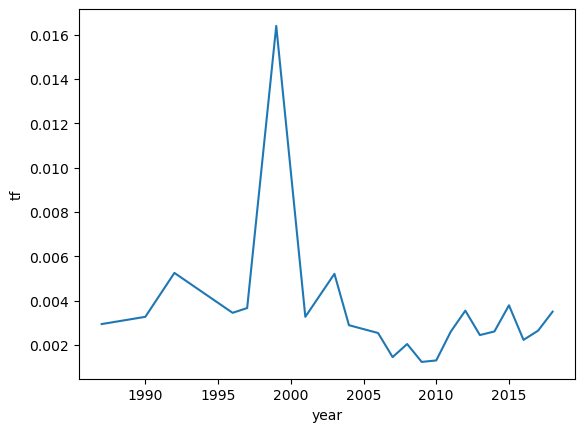

In [ ]:
sns.lineplot(x="year", y="tf", data=word_counts[word_counts.word == "gender"])

## Your Turn 

Go back and only select articles that are research articles-not reviews, and do the analysis again, what changes? 

First, use your Pandas knowledge and knowledge of comparators (==, !=, etc) to create code that will drop all rows that do not contain 'research-article' in the 'docSubType' category. 

In [5]:
justArticles = df.copy()

In [6]:
justArticles.drop(justArticles.loc[df['docSubType'] != 'research-article'].index, inplace=True)

In [7]:
justArticles

,id,title,isPartOf,publicationYear,doi,docType,docSubType,provider,collection,datePublished,...,creator,publisher,language,pageStart,pageEnd,placeOfPublication,keyphrase,wordCount,pageCount,outputFormat
0,http://www.jstor.org/stable/4167356,A Reply to Pateman on Singular They (Discussion),Language in Society,1983,NaN,article,research-article,jstor,NaN,1983-03-01,...,Donald G. Mackay,Cambridge University Press,eng,75,76,NaN,mackay; pateman; prescriptive; language; patem...,790,2,unigrams; bigrams; trigrams
1,http://www.jstor.org/stable/26847725,Deconstructing variation in pragmatic function,Language in Society,2018,NaN,article,research-article,jstor,NaN,2018-09-01,...,MARTINA WILTSCHKO; DEREK DENIS; ALEXANDRA D’ARCY,Cambridge University Press,eng,569,599,NaN,contextually derived; wiltschko derek; ina wil...,12359,31,unigrams; bigrams; trigrams
2,http://www.jstor.org/stable/4167072,Variable Data and Linguistic Convergence: Text...,Language in Society,1979,NaN,article,research-article,jstor,NaN,1979-08-01,...,Ronald Scollon,Cambridge University Press,eng,223,243,NaN,chipewyan; fort chipewyan; mandeville; consona...,9506,21,unigrams; bigrams; trigrams
3,http://www.jstor.org/stable/4167260,"Codes, Modalities, and the Process of Cultural...",Language in Society,1981,NaN,article,research-article,jstor,NaN,1981-12-01,...,Basil Bernstein,Cambridge University Press,eng,327,363,NaN,social division; classificatory; communicative...,17155,37,unigrams; bigrams; trigrams
13,http://www.jstor.org/stable/4166871,Speech Events and Natural Speech: Some Implica...,Language in Society,1976,NaN,article,research-article,jstor,NaN,1976-08-01,...,Nessa Wolfson,Cambridge University Press,eng,189,209,NaN,speech; interview; narratives; natural speech;...,10122,21,unigrams; bigrams; trigrams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4146,http://www.jstor.org/stable/26348500,Rethinking format: An examination of requests,Language in Society,2016,NaN,article,research-article,jstor,NaN,2016-09-01,...,BARBARA FOX; TRINE HEINEMANN,Cambridge University Press,eng,499,531,NaN,declaratives; interrogatives; request; want de...,12830,33,unigrams; bigrams; trigrams
4147,http://www.jstor.org/stable/4167517,"Livestock Auctions, Oral Poetry, and Ordinary ...",Language in Society,1984,NaN,article,research-article,jstor,NaN,1984-06-01,...,Koenraad Kuiper; Douglas Haggo,Cambridge University Press,eng,205,234,NaN,formulae; auctioneers; oral formulaic; koenraa...,13659,30,unigrams; bigrams; trigrams
4151,http://www.jstor.org/stable/4169266,"Gender, Publication and Citation in Sociolingu...",Language in Society,2003,NaN,article,research-article,jstor,NaN,2003-06-01,...,Bonnie Mcelhinny; Marijke Hols; Jeff Holtzkene...,Cambridge University Press,eng,299,328,NaN,gender; linguistic anthropology; mcelhinny hol...,15278,30,unigrams; bigrams; trigrams
4153,http://www.jstor.org/stable/4168209,"Holy Land, Holy Language: A Study of an Ultrao...",Language in Society,1991,NaN,article,research-article,jstor,NaN,1991-03-01,...,Lewis Glinert; Yosseph Shilhav,Cambridge University Press,eng,59,86,NaN,haredi; hebrew; language; jewish; yiddish; san...,14128,28,unigrams; bigrams; trigrams


Now, you'll need to only select the columns you need to do the analysis just like we did before

In [8]:
titles = df.copy()[["title", "publicationYear"]]
titles = titles.rename({"publicationYear":"year"}, axis=1)
titles.head()

,title,year
0,A Reply to Pateman on Singular They (Discussion),1983
1,Deconstructing variation in pragmatic function,2018
2,Variable Data and Linguistic Convergence: Text...,1979
3,"Codes, Modalities, and the Process of Cultural...",1981
4,The Evaluation of Language Regimes: Theory and...,2016


And now, run our four blocks of code to create our TF-IDF dataset

Finally, let's show the most frequent words by year-just like we did before. 

### LDA 

Our next type of text analysis is LDA or Latent Dirlicht Allocation. LDA is used for topic modeling, or, for taking a set of texts and generating (based on probability) common topics in that set of data. LDA will also then show which topics are most associated with which document in the given dataset. 

How? First LDA passes all of the text into a bag of words, meaning order and context are ignored, only the words counts matter and how often words appear in a document with other words matter. 

For example, if we were working with movie reviews and generating topics from those reviews we might expect to see topics that look like: 
* ghost
* house
* woods

* new york
* love
* romance

* puppy
* couple
* children

These groups of topics would apply to multiple reviews and show common themes and genres of film represented in the dataset. 

For our data, we are interested in seeinf if our titles hold any prevelant information about what kind of topics scholars submitting to the journal were discussing. 

In [9]:
pip install pyldavis

In [18]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

# Import the LDA items from scikit-learn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import *

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [19]:
stop_words = set(stopwords.words('english'))
custom_stopwords = ['te', 'mi', 'eh', 'tamil','john', 'hh', 'dc', 'rev', 'et', 'und', 'der', 'des', 'ii','de', 'writings', 'writers', 'write', 'ch', 'xi', 'usually', 'anthropology', 'anthropological', 'linguistic', 'linguistics', 'accept', 'accepted', 'accounts', 'edu', 'account', 'working', 'across', 'wored', 'act', 'action', 'utterances','works', 'absence', 'absent', 'abstract', 'ac', 'academic', 'access', 'according', 'values', 'variable', 'able', 'yet', 'yes', 'written', 'writing', 'would', 'world', 'among', 'www', 'doi', 'english', 'book', 'languages', 'discourse','studies', 'language', 'ability', 'young', 'york', 'year', 'years', 'oh', 'yeah', 'http', 'org', 'abilities', 'hear', 'heard', 'similar', 'similarly', 'helps', 'hb', 'head', 'heads', 'grice', 'hawaii', 'ab', 'zur', 'zimmerman', 'zero', 'zealand', 'zation', 'yu', 'ysis', 'accurate', 'accuracy', 'contexts','speach','linguistics','ed', 'io', 'al','linguistics', 'tions', 'tion', 'ing', 'non', 'un', 'pp','chapter','chapters','inter', 'author', 'authors', 'pages','page', 'speaker', 'speak']
stop_words.update(custom_stopwords)
stop_words = list(stop_words)

In [20]:
titles.head()

,title,year
0,A Reply to Pateman on Singular They (Discussion),1983
1,Deconstructing variation in pragmatic function,2018
2,Variable Data and Linguistic Convergence: Text...,1979
3,"Codes, Modalities, and the Process of Cultural...",1981
4,The Evaluation of Language Regimes: Theory and...,2016


In [21]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = stop_words,
                                max_df = 0.25,
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(titles['title'])
print(dtm_tf.shape)

(4163, 167)


In [ ]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(titles['title'])
print(dtm_tfidf.shape)

(4163, 167)


In [ ]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=20, random_state=0)

#### pyLDAvis

There is a very nice visualization for LDA called pyLDAvis, but it can be a little deceiving to interpret. 

The blue bars represent saliency, or the frequency of terms in the corpus 

If you hover over one of the circles, the bars will change. You'll see a new set of words and new red bars. Here, the blue bars still show the term's frequency, but now *saliency* means a little more because these terms are not only frequent, but the ones that were found most relevant to one another in terms of defining the topic. 

In other words, the top words shown in the topic are the words the model grabbed onto the most to make that topic. The red bar shows the frequency of that word within the given topic. 

The circles are also showing us some information. The size of circles shows how many articles (or titles) in our case fit into that topic. The distribution of circles shows topics relative relationship to one another. Circles that are closer together are more related than circles that are further apart. 

In [ ]:
pyLDAvis.lda_model.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.304539 -0.032079       1        1  12.371791
16     0.212200  0.012461       2        1   6.437697
18    -0.071733 -0.145031       3        1   5.928606
11    -0.145794 -0.059836       4        1   5.605497
12    -0.043660 -0.077100       5        1   5.247718
17    -0.149429  0.185964       6        1   5.171268
19     0.024348 -0.012139       7        1   5.076069
7     -0.025282  0.209058       8        1   5.026506
10    -0.011899 -0.050788       9        1   4.883070
13    -0.124898 -0.082306      10        1   4.750312
4     -0.121242 -0.043398      11        1   4.713823
5     -0.124087 -0.097292      12        1   4.558498
3      0.127829 -0.029996      13        1   4.485928
6     -0.073992  0.264987      14        1   4.244911
15    -0.006968 -0.156497      15        1   3.928175
14     0.072087 -0.031126      16        1   3.778583
0      0.096350  0.086824      17        1   3.678198
8      0.050452 -0.004568      18        1   3.658961
1     -0.016390 -0.102565      19        1   3.394080
9      0.027571  0.165428      20        1   3.060309, topic_info=             Term        Freq       Total Category  logprob  loglift
87         matter  280.000000  280.000000  Default  30.0000  30.0000
118      received  139.000000  139.000000  Default  29.0000  29.0000
116  publications  139.000000  139.000000  Default  28.0000  28.0000
129        social  122.000000  122.000000  Default  27.0000  27.0000
10           back  140.000000  140.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
80      knowledge    0.064062   12.719466  Topic20  -7.6857  -1.8044
107    politeness    0.064062   15.148572  Topic20  -7.6857  -1.9792
137      speakers    0.064062   15.075553  Topic20  -7.6857  -1.9743
73    interaction    0.064062   60.150674  Topic20  -7.6857  -3.3581
52       european    0.064062   14.684648  Topic20  -7.6857  -1.9481

[920 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0        14  0.950684  address
1         6  0.713354   africa
1        14  0.214006   africa
2         5  0.946375  african
3         3  0.272637      age
...     ...       ...      ...
163      17  0.974043   volume
164       3  0.387629    women
164      12  0.581444    women
165       3  0.978311    words
166      19  0.961287     work

[269 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 17, 19, 12, 13, 18, 20, 8, 11, 14, 5, 6, 4, 7, 16, 15, 1, 9, 2, 10])

In [ ]:
document_topic_distributions = lda_tf.transform(dtm_tf)

In [ ]:
def get_dominant_topic(document_topic_distribution):
    return document_topic_distribution.argmax()

title_topics = [get_dominant_topic(distribution) for distribution in document_topic_distributions]

titles = titles['title'].tolist()

# Print titles with their assigned topics
for i, title in enumerate(titles): # Assuming you have a list of titles
    print(f"Title: {title}\nTopic: {title_topics[i]}\n")

Title: a reply to pateman on singular they (discussion)
Topic: 0

Title: deconstructing variation in pragmatic function
Topic: 1

Title: variable data and linguistic convergence: texts and contexts in chipewyan
Topic: 0

Title: codes, modalities, and the process of cultural reproduction: a model
Topic: 18

Title: the evaluation of language regimes: theory and application to multilingual patent organizations
Topic: 19

Title: hand talk: sign language among american indian nations
Topic: 12

Title: review article
Topic: 0

Title: back matter
Topic: 2

Title: review article
Topic: 0

Title: review article
Topic: 0

Title: dutch: biography of a language
Topic: 0

Title: migrant communication enterprises: regimentation and resistance
Topic: 10

Title: discourse and identity
Topic: 11

Title: speech events and natural speech: some implications for sociolinguistic methodology
Topic: 18

Title: review article
Topic: 0

Title: volume information
Topic: 0

Title: back matter
Topic: 2

Title: the

## Your turn 

[Using the following dataset practice doing LDA.](https://drive.google.com/file/d/1gwn7x2ZDLOnwVrJp_WzQGQBLACRbpX0V/view?usp=sharing)

The data represents the full text of the articles pulled from the journal Language in Society, although it's been broken down into unigrams and then spliced back together in order to get accurate word counts for articles. 

Use the 'text' column to perform the analysis in the same way we did with our 'title' column

In [22]:
df = pd.read_csv("fullText.csv")
df.head()

,creator,title,publicationYear,index,text
0,"['James Stanlaw', 'Amy B. M. Tsui', 'James W. ...","Language Policy, Culture, and Identity in Asia...",2008,0,of of of of of of of of of of of of of of of o...
1,"['Henry Kahane', 'Björn H. Jernudd', 'Michael ...",Review Article,1991,1,greece is is is is is is tradition following e...
2,"['Manfred Görlach', 'Axel Hübler']",Review Article,1986,2,irrelevant insufficiently early ideas ideas pr...
3,['Donna Lardiere'],On the Linguistic Shaping of Thought: Another ...,1992,3,empirical chological approach test test natura...
4,['D. H.'],Review Article,1986,4,individual countries editor editor claim aspec...


In [23]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = stop_words,
                                max_df = 0.25,
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df['text'])
print(dtm_tf.shape)

(4163, 27330)


In [24]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'])
print(dtm_tfidf.shape)

(4163, 27330)


In [25]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=20, random_state=0)

In [26]:
pyLDAvis.lda_model.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15     0.050312  0.040910       1        1  12.557736
19     0.090231 -0.138789       2        1   8.002394
16    -0.002429  0.077323       3        1   7.846451
6     -0.002989  0.154568       4        1   6.954409
2      0.049391  0.054725       5        1   5.616100
18     0.071999 -0.116962       6        1   5.103777
13     0.014354 -0.005480       7        1   5.006656
3      0.043141 -0.026932       8        1   4.963875
8     -0.224480  0.088017       9        1   4.925833
14     0.068638 -0.077691      10        1   4.293732
0      0.001242 -0.058220      11        1   4.281454
7      0.060433 -0.098527      12        1   4.199093
10     0.077245  0.037010      13        1   4.052283
5     -0.132175  0.188030      14        1   3.942949
4      0.095049 -0.116134      15        1   3.877795
9      0.011437  0.154115      16        1   3.628395
11     0.068294 -0.006244      17        1   3.242549
12     0.066495  0.007710      18        1   3.114880
17     0.059074  0.013595      19        1   2.957902
1     -0.465262 -0.171024      20        1   1.431736, topic_info=                Term         Freq        Total Category  logprob  loglift
9854          gender  6628.000000  6628.000000  Default  30.0000  30.0000
22832        spanish  7260.000000  7260.000000  Default  29.0000  29.0000
26027            usa  3582.000000  3582.000000  Default  28.0000  28.0000
27011          women  7073.000000  7073.000000  Default  27.0000  27.0000
6369         dialect  5521.000000  5521.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
12259  institutional   416.835695  2031.846577  Topic20  -5.0289   2.6623
19533    publication   354.046634  1420.882666  Topic20  -5.1921   2.8567
26039          users   343.671667  1323.029960  Topic20  -5.2219   2.8983
7367         editors   347.823557  1554.751347  Topic20  -5.2099   2.7489
21936           sent   325.206279  1142.337571  Topic20  -5.2771   2.9899

[1530 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
3          4  0.962837         aae
3          5  0.021396         aae
3         14  0.014264         aae
8          4  0.742681        aave
8          5  0.036385        aave
...      ...       ...         ...
27286     16  0.056967  zealanders
27286     17  0.037978  zealanders
27286     18  0.816526  zealanders
27294     14  0.968219         zgl
27297      3  0.991192    zhejiang

[11280 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 20, 17, 7, 3, 19, 14, 4, 9, 15, 1, 8, 11, 6, 5, 10, 12, 13, 18, 2])